In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
states_H = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

In [4]:
states_H.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200410,AK,246.0,7186.0,NaN,NaN,28.0,NaN,NaN,NaN,...,28.0,7432,7432,7432,2,0.0,1.0,198.0,11.0,209.0
1,20200410,AL,2968.0,18058.0,NaN,NaN,368.0,NaN,NaN,NaN,...,368.0,21026,21026,21026,1,6.0,35.0,0.0,199.0,199.0
2,20200410,AR,1171.0,15949.0,NaN,86.0,130.0,NaN,43.0,33.0,...,130.0,17120,17120,17120,5,2.0,0.0,2117.0,52.0,2169.0
3,20200410,AS,0.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,31,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200410,AZ,3112.0,34622.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37734,37734,37734,4,8.0,0.0,462.0,94.0,556.0


In [5]:
states_H['prev_day_positive'] = states_H['positive'] - states_H['positiveIncrease']

In [6]:
states_H['positive_increase_rate'] = states_H['positiveIncrease'] / states_H['prev_day_positive'] * 100

In [45]:
state = 'NY'

## Trends for the state {{state}}

In [46]:
state_query = str.format("state == '{}'", state)

In [47]:
state_df = states_H.query(state_query).sort_values(by='date')

### Daily Cumulative Positive Cases

In [48]:
state_df.plot(kind='bar',x='date', y='positive', label='Cumulative Positive')

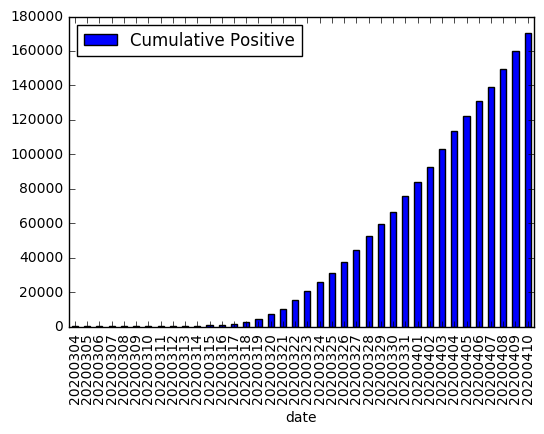

In [49]:
plt.show()

### Daily Cumulative recovered cases

In [50]:
state_df.plot(kind='bar', x='date', y='recovered')

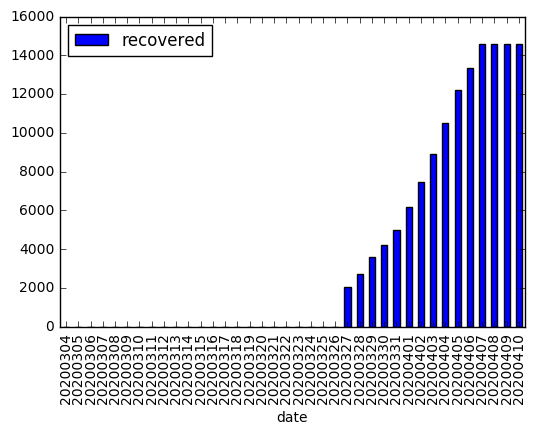

In [51]:
plt.show()

### Daily positive Case counts

In [52]:
state_df.plot(kind='bar', stacked=True, x='date', y='positiveIncrease', label="Daily Positive Cases")

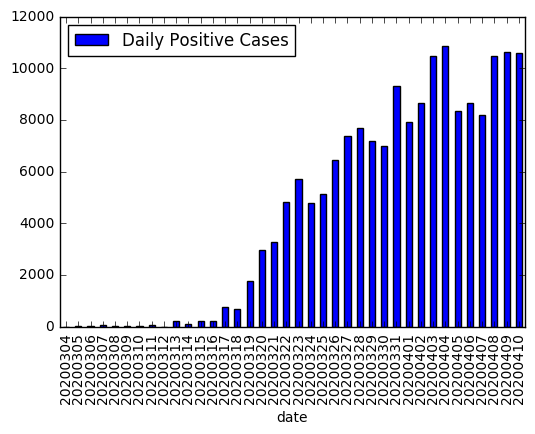

In [53]:
plt.show()

### Daily positive cases increase rate - relative to cumulative positie cases

In [54]:
state_df.plot(kind='bar', x='date', y='positive_increase_rate')

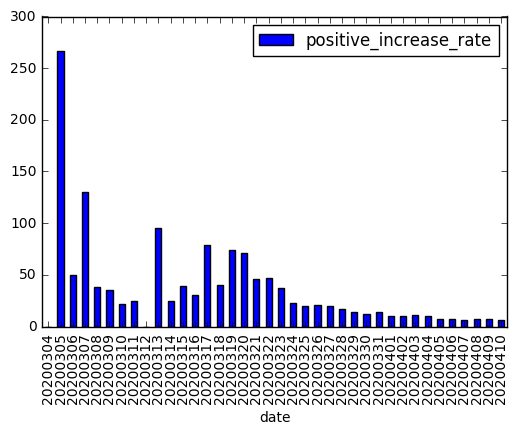

In [55]:
plt.show()